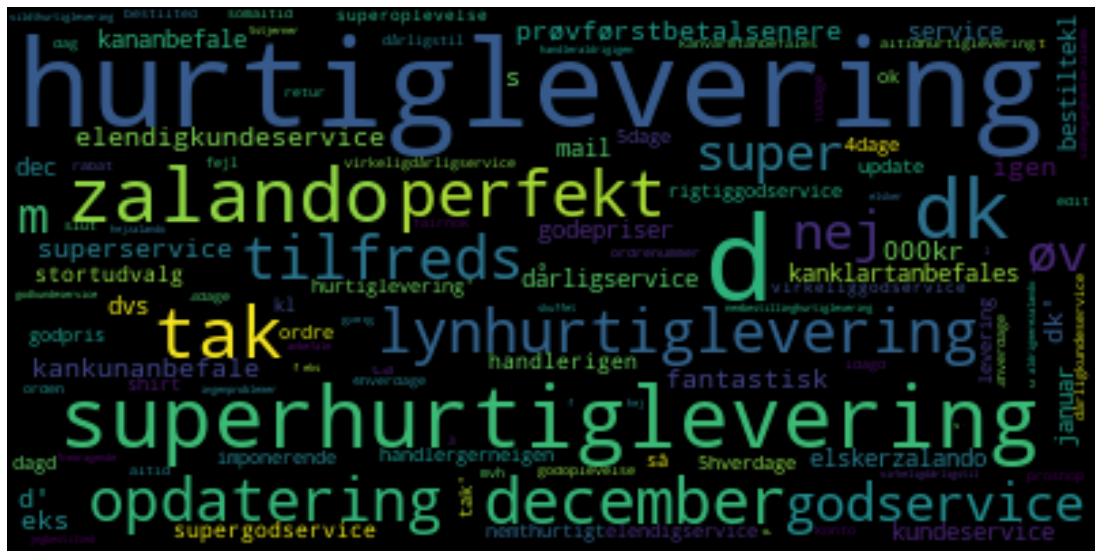

In [17]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nltk.download('stopwords')
# nltk.download('punkt')



df = pd.read_csv("ProShop_Zalando_test.csv")


df.columns = ["rating", "review"]
rawlist = list(df.review)


rawlist = str(rawlist)


word_tokens = word_tokenize(rawlist)



filtered_sentence = [w for w in word_tokens if not w.lower()]
filtered_sentence = []

# x1 = df.set_index('review')

# x = df['review']


# print(type(x1))

# words = x1['review']
# print(words)

shortlisted_words= filtered_sentence

# lines=""
# for line in x:
#     lines = lines + "".join(line)
    
# lines = lines.split()



#print(lines)

stopwords = set(stopwords.words('danish'))

#Stopwords mangler
for w in word_tokens:
    if w not in stopwords:
       filtered_sentence.append(w)

#print(filtered_sentence)
words =''.join(str(item) for item in filtered_sentence)

#CREATE NEW WORDCLOUD WITH NEW SENTENCE WITH REMOVED STOPWORDS
wordcloud = WordCloud().generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()